In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn import metrics

In [2]:
df = pd.read_csv('Property_structured_data.csv')

In [3]:
initial_df = df.shape

In [4]:
initial_df_columns = df.columns.to_list()

## Clean Database

### Price (float)

In [5]:
z_scores_price = stats.zscore(df['price'])
abs_z_scores_price = np.abs(z_scores_price) 
filtered_entries_price = (abs_z_scores_price < 3)
df = df[filtered_entries_price]

In [6]:
df.loc[df["price"] >= 800000, "type_of_property"] = "OTHER"

In [7]:
df= df.loc[df['price'] != -1]
df.shape

(58318, 23)

### Surface (float)

In [8]:
df = df.loc[df['surface'] <= 800]

In [9]:
df = df.loc[df['surface'] != -1]
df.shape

(48239, 23)

### Sub Type of property (filter and drop)

In [10]:
df['subtype_of_property'].value_counts()

HOUSE                   20452
APARTMENT               15686
VILLA                    2701
APARTMENT_BLOCK          1322
DUPLEX                   1220
GROUND_FLOOR             1135
PENTHOUSE                 968
MIXED_USE_BUILDING        927
FLAT_STUDIO               692
EXCEPTIONAL_PROPERTY      511
SERVICE_FLAT              483
MANSION                   437
TOWN_HOUSE                375
COUNTRY_COTTAGE           293
BUNGALOW                  242
LOFT                      225
FARMHOUSE                 147
TRIPLEX                   114
CHALET                    107
OTHER_PROPERTY             67
MANOR_HOUSE                61
KOT                        58
CASTLE                     15
PAVILION                    1
Name: subtype_of_property, dtype: int64

In [11]:
df= df.loc[df['subtype_of_property'] != 'APARTMENT_BLOCK']
df.shape

(46917, 23)

In [12]:
df= df.loc[df['subtype_of_property'] != 'MIXED_USE_BUILDING']
df.shape

(45990, 23)

### Number of bedrooms (int)

In [13]:
df = df.loc[df['number_of_bedrooms'] <200]


In [14]:
df['number_of_bedrooms'] = df['number_of_bedrooms'].replace(-1,0)

In [15]:
df['number_of_bedrooms'].value_counts()

3     15099
2     14672
4      6747
1      4870
5      2450
6       873
0       735
7       261
8       129
9        75
10       31
11       19
12        7
13        5
14        4
17        3
15        2
16        2
30        1
18        1
66        1
31        1
Name: number_of_bedrooms, dtype: int64

### Zip Code (category)

#### XX

In [16]:
df['zip_code_xx'] = df['postal_code'].apply(lambda x : 'be_zip_'+str(x)[:2])

In [17]:
df['zip_code_xx'].value_counts()

be_zip_10    3367
be_zip_11    1517
be_zip_83    1452
be_zip_20    1290
be_zip_84    1270
             ... 
be_zip_42     160
be_zip_79     131
be_zip_76     109
be_zip_47      85
be_zip_64      52
Name: zip_code_xx, Length: 80, dtype: int64

#### X

In [18]:
df['zip_code_x'] = df['postal_code'].apply(lambda x : 'be_zip_'+str(x)[:1])

In [19]:
df['zip_code_x'].value_counts()

be_zip_1    9631
be_zip_2    7632
be_zip_8    6871
be_zip_9    6247
be_zip_3    4036
be_zip_4    3712
be_zip_7    3074
be_zip_6    3045
be_zip_5    1740
Name: zip_code_x, dtype: int64

### Land surface (float)

In [20]:
#df.loc[(df['land_surface'] == -1) & (df['garden_surface'] > 0 )]

In [21]:
df['land_surface'] = [land_surface if land_surface != -1 else garden_surface if garden_surface > 0 else land_surface for garden_surface,land_surface in zip(df['garden_surface'],df['land_surface'])]

In [22]:
df['land_surface'] = df['land_surface'].replace(-1,0)

In [23]:
df['land_surface'].value_counts()

0       21400
100       207
200       190
300       158
150       152
        ...  
2641        1
2054        1
1965        1
3068        1
4233        1
Name: land_surface, Length: 3308, dtype: int64

### Garden (0,1)

In [24]:
df['garden'] = df['garden'].replace(-1,0)

In [25]:
df['garden'].value_counts()

0    30215
1    15773
Name: garden, dtype: int64

### Garden surface (float)

In [26]:
df['garden_surface'] = df['garden_surface'].replace(-1,0)
df['garden_surface'] = df['garden_surface'].replace(1,0)

In [27]:
df['garden_surface'].value_counts()

0        36348
100        299
200        266
50         196
300        192
         ...  
2267         1
586          1
10997        1
737          1
7200         1
Name: garden_surface, Length: 1352, dtype: int64

### Fully equiped kitchen  (0,1)

In [28]:
#df["fully_equipped_kitchen"] = df["fully_equipped_kitchen"].map({"-1.0": 0.25, "1.0": 1,"-1": 0.25, "1": 1, "INSTALLED": 0.5, "SEMI_EQUIPPED": 0.75, "NOT_INSTALLED": 0, "USA_INSTALLED": 0.5, "USA_SEMI_EQUIPPED": 0.75, "USA_UNINSTALLED": 0})

In [29]:
df["fully_equipped_kitchen"] = df["fully_equipped_kitchen"].map({"-1.0": 0, "1.0": 1,"-1": 0, "1": 1, "INSTALLED": 0, "SEMI_EQUIPPED": 1, "NOT_INSTALLED": 0, "USA_INSTALLED": 0, "USA_SEMI_EQUIPPED": 1, "USA_UNINSTALLED": 0})

In [30]:
df["fully_equipped_kitchen"].value_counts()

0    33721
1    12267
Name: fully_equipped_kitchen, dtype: int64

### Swiming pool  (0,1)

In [31]:
df['swimming_pool'] = df['swimming_pool'].replace(-1,0)

In [32]:
df['swimming_pool'].value_counts()

0    45052
1      936
Name: swimming_pool, dtype: int64

### Furnished (0,1)

In [33]:
df['furnished'] = df['furnished'].replace(-1,0)

In [34]:
df['furnished'].value_counts()

0    44783
1     1205
Name: furnished, dtype: int64

### Open fire (0,1)

In [35]:
df['open_fire'] = df['open_fire'].replace(-1,0)

In [36]:
df['open_fire'].value_counts()

0    43920
1     2068
Name: open_fire, dtype: int64

### Terrace (0,1)

In [37]:
df['terrace'] = df['terrace'].replace(-1,0)

In [38]:
df['terrace'].value_counts()

1    29302
0    16686
Name: terrace, dtype: int64

### Terrace surface (float)

we have two terraces > 1000 m2 !

In [39]:
df = df.loc[df['terrace_surface'] < 500]

In [40]:
df['terrace_surface'] = df['terrace_surface'].replace(-1,0)

In [41]:
df['terrace_surface'].value_counts()

0      26713
20      1191
10      1084
15       939
12       868
       ...  
163        1
137        1
190        1
293        1
290        1
Name: terrace_surface, Length: 183, dtype: int64

### Facades (int)

In [42]:
df = df.loc[df["number_of_facades"] < 9]

In [43]:
df["number_of_facades"] = np.where((df["number_of_facades"] == -1) & (df["type_of_property"] == "APARTMENT"), 1, df["number_of_facades"])
df["number_of_facades"] = np.where((df["number_of_facades"] == -1) & (df["type_of_property"] == "HOUSE"), 2, df["number_of_facades"])

In [44]:
df = df.loc[df["number_of_facades"] != -1]

In [45]:
df['number_of_facades'].value_counts()

2    20272
4     9268
3     8129
1     7777
6        6
5        6
8        3
Name: number_of_facades, dtype: int64

### State of the building (category)

Tranform this part to category

In [46]:
df["state_of_the_building"] = df["state_of_the_building"].map({
    "NO_INFO": "TO_RENOVATE",#0.25, 
    "TO_BE_DONE_UP": "JUST_RENOVATED",#0.75, 
    "TO_RENOVATE": "TO_RENOVATE",#0.25, 
    "TO_RESTORE": "TO_REBUILD",#0.25, 
    "JUST_RENOVATED": "JUST_RENOVATED",#0.75, 
    "GOOD": "GOOD",#0.5, 
    "AS_NEW": "NEW"#1.0
})

In [47]:
df["state_of_the_building"].value_counts()

TO_RENOVATE       16151
GOOD              12534
NEW               10559
JUST_RENOVATED     6035
TO_REBUILD          182
Name: state_of_the_building, dtype: int64

### Type of property (category)

Separate into HOUSE, APARTMENTS and OTHERS

In [48]:
others = ["CHALET", "MANOR_HOUSE", "OTHER_PROPERTY", "CASTLE", "PAVILION"]

In [49]:
df.loc[df["price"] >= 800000, "type_of_property"] = "OTHER"

In [50]:
df['type_of_property'] = np.where((df['number_of_bedrooms'] > 20), "OTHER", df['type_of_property'])

In [51]:
df.loc[df["subtype_of_property"].isin(others), "type_of_property"] = "OTHER"

In [52]:
df['type_of_property'].value_counts()

HOUSE        23527
APARTMENT    19808
OTHER         2126
Name: type_of_property, dtype: int64

In [53]:
df_other = df.loc[df["type_of_property"] == "OTHER"]

In [54]:
df= df.loc[df["type_of_property"] != "OTHER"]

In [55]:
df.describe()

,id,postal_code,price,number_of_bedrooms,surface,fully_equipped_kitchen,furnished,open_fire,terrace,terrace_surface,garden,garden_surface,land_surface,number_of_facades,swimming_pool
count,4.333500e+04,43335.000000,43335.000000,43335.000000,43335.000000,43335.000000,43335.000000,43335.000000,43335.000000,43335.000000,43335.000000,43335.000000,4.333500e+04,43335.000000,43335.000000
mean,9.972983e+06,5054.099873,324311.691266,2.716534,146.404084,0.258775,0.024830,0.039298,0.632353,9.449221,0.338549,110.896596,4.581338e+02,2.373001,0.013546
std,2.631916e+05,3031.401207,150556.015778,1.238357,79.948942,0.437967,0.155608,0.194306,0.482170,18.867219,0.473221,1137.311177,5.953566e+03,0.981798,0.115596
min,1.882546e+06,1000.000000,2500.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,9.941654e+06,2180.000000,219000.000000,2.000000,91.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000
50%,1.005789e+07,4420.000000,295000.000000,3.000000,129.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.700000e+01,2.000000,0.000000
75%,1.011444e+07,8380.000000,398000.000000,3.000000,180.000000,1.000000,0.000000,0.000000,1.000000,13.000000,1.000000,0.000000,4.120000e+02,3.000000,0.000000
max,1.015115e+07,9992.000000,799950.000000,17.000000,800.000000,1.000000,1.000000,1.000000,1.000000,420.000000,1.000000,100000.000000,1.100000e+06,6.000000,1.000000


### Price/m2

In [56]:
df['price_m2'] = df['price']/df['surface']

In [57]:
df['price_m2'].value_counts()

2500.000000    260
2000.000000    165
3000.000000    163
1500.000000    107
2750.000000    106
              ... 
3454.891304      1
3307.228916      1
3312.169014      1
1605.539474      1
1705.038760      1
Name: price_m2, Length: 18762, dtype: int64

### API list

In [58]:
api_list = ['surface','type_of_property','number_of_bedrooms','postal_code','land_surface','garden','garden_surface','fully_equipped_kitchen','swimming_pool','furnished','open_fire','terrace','terrace_surface','number_of_facades','state_of_the_building','zip_code_xx','zip_code_x','price']

In [59]:
df = df[api_list]

In [60]:
claned_df = df.shape

## Check database

In [61]:
print(f'initial_df {initial_df} claned_df {claned_df}')

initial_df (62430, 23) claned_df (43335, 18)


In [62]:
df.describe()

,surface,number_of_bedrooms,postal_code,land_surface,garden,garden_surface,fully_equipped_kitchen,swimming_pool,furnished,open_fire,terrace,terrace_surface,number_of_facades,price
count,43335.000000,43335.000000,43335.000000,4.333500e+04,43335.000000,43335.000000,43335.000000,43335.000000,43335.000000,43335.000000,43335.000000,43335.000000,43335.000000,43335.000000
mean,146.404084,2.716534,5054.099873,4.581338e+02,0.338549,110.896596,0.258775,0.013546,0.024830,0.039298,0.632353,9.449221,2.373001,324311.691266
std,79.948942,1.238357,3031.401207,5.953566e+03,0.473221,1137.311177,0.437967,0.115596,0.155608,0.194306,0.482170,18.867219,0.981798,150556.015778
min,1.000000,0.000000,1000.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2500.000000
25%,91.000000,2.000000,2180.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,219000.000000
50%,129.000000,3.000000,4420.000000,5.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,295000.000000
75%,180.000000,3.000000,8380.000000,4.120000e+02,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,13.000000,3.000000,398000.000000
max,800.000000,17.000000,9992.000000,1.100000e+06,1.000000,100000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,420.000000,6.000000,799950.000000


In [63]:
for index,atribute in enumerate(df.columns.to_list()):
    print(atribute)
    print(df[df.columns.to_list()[index]].value_counts())
    print('\n')

surface
100    875
150    869
90     829
120    801
110    703
      ... 
539      1
633      1
623      1
686      1
595      1
Name: surface, Length: 585, dtype: int64


type_of_property
HOUSE        23527
APARTMENT    19808
Name: type_of_property, dtype: int64


number_of_bedrooms
3     14387
2     14339
4      6089
1      4821
5      1990
0       707
6       641
7       176
8        92
9        53
10       15
11       11
12        5
16        2
13        2
15        2
14        2
17        1
Name: number_of_bedrooms, dtype: int64


postal_code
9000    625
1000    606
8400    565
8370    508
1180    488
       ... 
7602      1
7912      1
6662      1
4721      1
8957      1
Name: postal_code, Length: 1041, dtype: int64


land_surface
0       20576
100       200
200       179
300       152
160       149
        ...  
3951        1
1836        1
1633        1
1727        1
5414        1
Name: land_surface, Length: 2823, dtype: int64


garden
0    28664
1    14671
Name: garden, dtype: 

# Data preprocessing

In [64]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['type_of_property', 'zip_code_x','state_of_the_building']),
    remainder='passthrough')

In [65]:
transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())

/home/david/MyGithub/challenge-regression/env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [66]:
transformed_df.columns.to_list()

['onehotencoder__x0_APARTMENT',
 'onehotencoder__x0_HOUSE',
 'onehotencoder__x1_be_zip_1',
 'onehotencoder__x1_be_zip_2',
 'onehotencoder__x1_be_zip_3',
 'onehotencoder__x1_be_zip_4',
 'onehotencoder__x1_be_zip_5',
 'onehotencoder__x1_be_zip_6',
 'onehotencoder__x1_be_zip_7',
 'onehotencoder__x1_be_zip_8',
 'onehotencoder__x1_be_zip_9',
 'onehotencoder__x2_GOOD',
 'onehotencoder__x2_JUST_RENOVATED',
 'onehotencoder__x2_NEW',
 'onehotencoder__x2_TO_REBUILD',
 'onehotencoder__x2_TO_RENOVATE',
 'surface',
 'number_of_bedrooms',
 'postal_code',
 'land_surface',
 'garden',
 'garden_surface',
 'fully_equipped_kitchen',
 'swimming_pool',
 'furnished',
 'open_fire',
 'terrace',
 'terrace_surface',
 'number_of_facades',
 'zip_code_xx',
 'price']

### Drop values from onehotencoder

In [67]:
drop_list = ['onehotencoder__x0_APARTMENT',
 #'onehotencoder__x0_HOUSE',
 'onehotencoder__x1_be_zip_1',
 'onehotencoder__x1_be_zip_2',
 'onehotencoder__x1_be_zip_3',
 'onehotencoder__x1_be_zip_4',
 'onehotencoder__x1_be_zip_5',
 'onehotencoder__x1_be_zip_6',
 'onehotencoder__x1_be_zip_7',
 'onehotencoder__x1_be_zip_8',
 #'onehotencoder__x1_be_zip_9',
 'onehotencoder__x2_GOOD',
 'onehotencoder__x2_JUST_RENOVATED',
 'onehotencoder__x2_NEW',
 'onehotencoder__x2_TO_REBUILD',
 #'onehotencoder__x2_TO_RENOVATE',
 'surface',
 'number_of_bedrooms',
 #'postal_code',
 'land_surface',
 'garden',
 #'garden_surface',
 'fully_equipped_kitchen',
 'swimming_pool',
 #'furnished',
 'open_fire',
 #'terrace',
 'terrace_surface',
 'number_of_facades',
 #'zip_code_xx',
 'price']

In [68]:
transformed_df = transformed_df[drop_list]

In [69]:
for index,atribute in enumerate(transformed_df.columns.to_list()):
    print(atribute)
    print(transformed_df[transformed_df.columns.to_list()[index]].value_counts())
    print('\n')

onehotencoder__x0_APARTMENT
0.0    23527
1.0    19808
Name: onehotencoder__x0_APARTMENT, dtype: int64


onehotencoder__x1_be_zip_1
0.0    34577
1.0     8758
Name: onehotencoder__x1_be_zip_1, dtype: int64


onehotencoder__x1_be_zip_2
0.0    36240
1.0     7095
Name: onehotencoder__x1_be_zip_2, dtype: int64


onehotencoder__x1_be_zip_3
0.0    39523
1.0     3812
Name: onehotencoder__x1_be_zip_3, dtype: int64


onehotencoder__x1_be_zip_4
0.0    39693
1.0     3642
Name: onehotencoder__x1_be_zip_4, dtype: int64


onehotencoder__x1_be_zip_5
0.0    41665
1.0     1670
Name: onehotencoder__x1_be_zip_5, dtype: int64


onehotencoder__x1_be_zip_6
0.0    40377
1.0     2958
Name: onehotencoder__x1_be_zip_6, dtype: int64


onehotencoder__x1_be_zip_7
0.0    40331
1.0     3004
Name: onehotencoder__x1_be_zip_7, dtype: int64


onehotencoder__x1_be_zip_8
0.0    36964
1.0     6371
Name: onehotencoder__x1_be_zip_8, dtype: int64


onehotencoder__x2_GOOD
0.0    31408
1.0    11927
Name: onehotencoder__x2_GOOD, d

# Split Data

In [70]:
y = transformed_df.iloc[:,-1].values  #price
x = transformed_df.iloc[:,:-1].values  #rest

In [71]:
x = x.astype(int)

In [72]:
y = y.astype(int)

# Linear regresion

### First split

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [74]:
x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [75]:
print("x_train:",x_train.shape)
print("x_dev:",x_dev.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_dev:",y_dev.shape)
print("y_test:",y_test.shape)

x_train: (27734, 22)
x_dev: (6934, 22)
x_test: (8667, 22)
y_train: (27734,)
y_dev: (6934,)
y_test: (8667,)


### Train the model

In [76]:
MLR = LinearRegression()

In [77]:
MLR.fit(x_train,y_train)

LinearRegression()

In [78]:
print(f'constant : {MLR.intercept_}')
print(f'constant : {MLR.coef_}')

constant : 83188.6751087711
constant : [ 3.67926119e+04  3.95432965e+04  9.99260051e+03 -6.68595582e+03
 -8.90687958e+04 -1.04872629e+05 -1.14733247e+05 -1.13851905e+05
  7.72227724e+03 -4.89276187e+03 -1.63563449e+04  5.05153300e+04
 -5.70850450e+04  8.33418649e+02  2.15362226e+04  3.41109043e-01
  8.17188371e+03  1.36793860e+04  7.10322831e+04  3.49392232e+04
  7.60708334e+02  1.57571674e+04]


In [79]:
y_predict = MLR.predict(x_test)

In [80]:
df_mlr =  pd.DataFrame(data=y_test, columns =['y_test'])
df_mlr['predict'] = y_predict.astype(int)
df_mlr['delta'] = round((df_mlr['y_test'] - df_mlr['predict'])/df_mlr['y_test'],2)

In [81]:
df_mlr

,y_test,predict,delta
0,235538,307249,-0.30
1,595000,474896,0.20
2,179000,247755,-0.38
3,144500,119060,0.18
4,325000,290517,0.11
...,...,...,...
8662,174000,306751,-0.76
8663,215000,276130,-0.28
8664,265000,308962,-0.17
8665,249000,339070,-0.36


In [82]:
df_mlr.describe()

,y_test,predict,delta
count,8667.000000,8667.000000,8667.000000
mean,322975.588785,323330.205607,-0.120925
std,151631.701520,104500.167883,0.452568
min,15000.000000,23641.000000,-12.910000
25%,217000.000000,257967.000000,-0.290000
50%,292500.000000,316007.000000,-0.060000
75%,396000.000000,379229.500000,0.140000
max,799900.000000,947723.000000,0.820000


### Predict a single value

In [83]:
test_objt = x_dev[1]  #test object

In [84]:
test_objt

array([  1,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   1,   0,
       108,   2,   0,   0,   0,   0,   0,  19,   1])

In [85]:
y_dev[1] #desired output

470000

In [86]:
y_predict_single_objt = MLR.predict(test_objt.reshape(1,-1))
round(float(y_predict_single_objt),2)

244720.11

In [87]:
(round(float(y_predict_single_objt),2) - y_dev[1])/y_dev[1]

-0.47931891489361705

In [88]:
r_sqr = metrics.r2_score(y_test,y_predict)
print('R-square Error:',r_sqr)

R-square Error: 0.5006555747664234


In [89]:
n = 29632 #number of rows
p = 27 #number of columns
adj_r_sqr = 1-(1-r_sqr)*(n-1)/(n-p-1)
print('Adjusted R-square Error:',adj_r_sqr)

Adjusted R-square Error: 0.500200153219291


### Model evaluation

In [90]:
df.corr()['price']

/tmp/ipykernel_17251/441180871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


surface                   0.525208
number_of_bedrooms        0.416912
postal_code              -0.122133
land_surface              0.052930
garden                    0.141142
garden_surface            0.046599
fully_equipped_kitchen    0.107789
swimming_pool             0.131807
furnished                -0.024454
open_fire                 0.141956
terrace                   0.124226
terrace_surface           0.176642
number_of_facades         0.206524
price                     1.000000
Name: price, dtype: float64

zscore = 2
surface                   0.302527
number_of_bedrooms        0.425484
postal_code              -0.134247
land_surface              0.096298
garden                    0.123056
garden_surface            0.083741
fully_equipped_kitchen    0.121539
swimming_pool             0.203234
furnished                -0.002207
open_fire                 0.169739
terrace                   0.117912
terrace_surface           0.185802
number_of_facades         0.252756
price                     1.000000
Name: price, dtype: float64

zscore = None
surface                   0.375369
number_of_bedrooms        0.408380
postal_code              -0.115528
land_surface              0.250008
garden                    0.064717
garden_surface            0.178264
fully_equipped_kitchen    0.127337
swimming_pool             0.275658
furnished                 0.011266
open_fire                 0.148603
terrace                   0.098585
terrace_surface           0.188799
number_of_facades         0.239361
price                     1.000000
Name: price, dtype: float64

Text(0, 0.5, 'Surface m²')

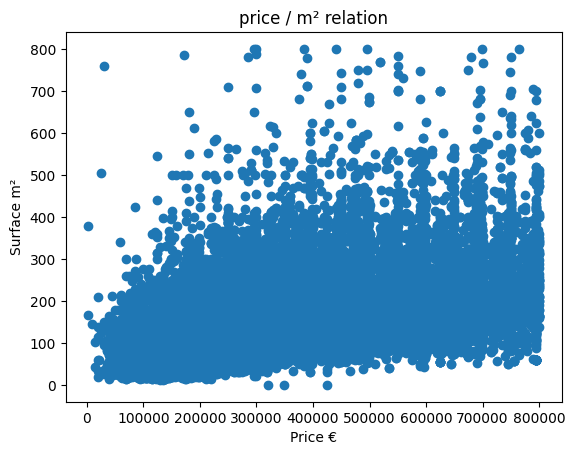

In [91]:
plt.scatter(df['price'],df['surface'])
plt.title('price / m² relation')
plt.xlabel('Price €')
plt.ylabel('Surface m²')

Text(0, 0.5, 'number of bedrooms')

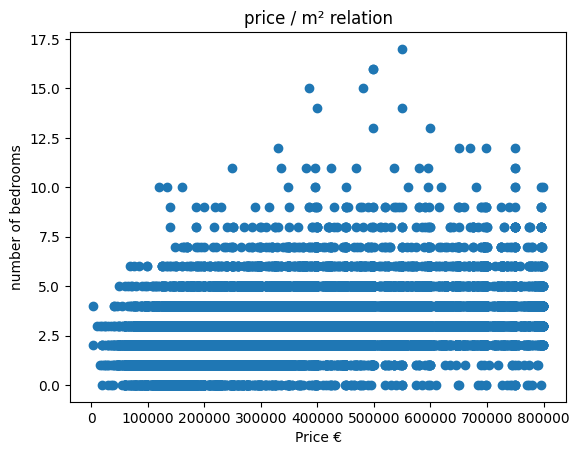

In [92]:
plt.scatter(df['price'],df['number_of_bedrooms'])
plt.title('price / m² relation')
plt.xlabel('Price €')
plt.ylabel('number of bedrooms')